In [1]:
%cd ..

/home/dani2442/Projects/bifurcationjax


/home/dani2442/Projects/bifurcationjax/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from bifurcationjax.continuation.Corrector import NaturalCorrector
from bifurcationjax.continuation.Predictor import TangentPredictor
from bifurcationjax.continuation.Continuation import continuation
from bifurcationjax.BifurcationProblem import BifurcationProblem

In [35]:
@jax.jit
def F(x, p):
    return x*(p-x)

@jax.jit
def G(z):
    return F(z[:-1],z[-1])

@jax.jit
def H(z):
    return z[0]*(z[1]-z[0])

@jax.jit
def K(z):
    x, p = z[:-1], z[-1]
    return x*(p-x)

@jax.jit
def L(x, p):
    return K(x.append(p))

In [31]:
v = jnp.array([1.0, 2., 2.])

In [40]:
J = jax.hessian(K)
J(v)@v

Array([[ 0.,  0.,  1.],
       [ 0., -2.,  2.]], dtype=float32)

In [46]:
J = jax.hessian(G)
J(v)@v

Array([[ 0.,  0.,  1.],
       [ 0., -2.,  2.]], dtype=float32)

In [39]:
J = jax.hessian(H)
J(jnp.array(v))

Array([[-2.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [11]:
p_min = -1
p_max = 1
p0 = 0.2
x0 = jnp.array([0.])

In [16]:
prob = BifurcationProblem(F, x0, p0,)
correction = NaturalCorrector()
prediction = TangentPredictor()
xs, ps, stability, eigenvalues, tps = continuation(prob, prediction, correction, p_min, p_max, dsmax=0.01)

In [17]:
dict_color = {'bp':0, 'hopf':1, 'nd':2}

In [18]:
cmap = plt.get_cmap()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


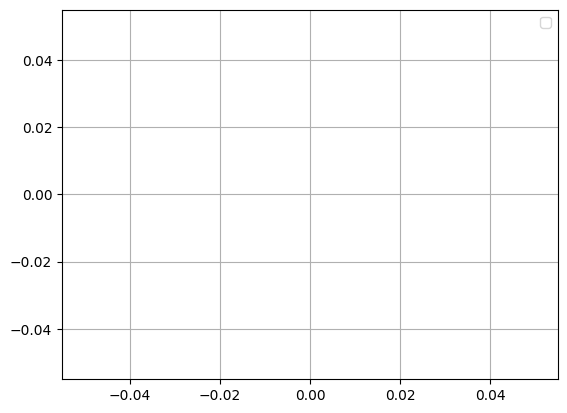

In [19]:
fig, ax = plt.subplots()
for tp, p, x in zip(tps, ps, xs):
    if tp is not None:
        ax.scatter(p,x[0], c=cmap(dict_color[tp]), label=tp)
ax.plot(ps, [x[0] for x in xs])
plt.grid()
plt.legend()
plt.show()

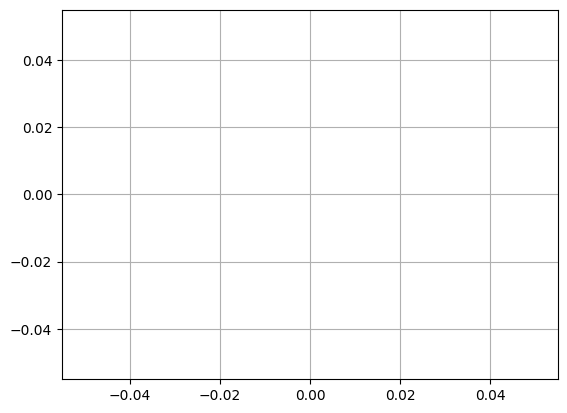

In [9]:
colors = ["blue" if s else "red" for s in stability]

plt.scatter(ps, [x[0] for x in xs], c=colors)
plt.grid()
plt.show()